## Ayudantía 2

### Profesor: Luis Cossio
### Ayudante: Gabriel Díaz

In [1]:
#Importar librerias 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, pearsonr

### Columnas del Dataset
[Kaggle_Dataset_Titanic](https://www.kaggle.com/code/roblexnana/data-viz-tutorial-with-titanic-and-seaborn)
- Sobrevivió: Resultado de la supervivencia (0 = No; 1 = Sí)
- Clase: Clase socioeconómica (1 = Clase alta; 2 = Clase media; 3 = Clase baja)
- Nombre: Nombre del pasajero
- Sexo: Sexo del pasajero
- Edad: Edad del pasajero (Algunas entradas contienen NaN)
- SibSp: Número de hermanos y cónyuges del pasajero a bordo
- Parch: Número de padres e hijos del pasajero a bordo
- Billete: Número de billete del pasajero
- Tarifa (fare): Tarifa pagada por el pasajero
- Camarote: Número de camarote del pasajero (Algunas entradas contienen NaN)
- Embarcado: Puerto de embarque del pasajero (C = Cherburgo; Q = Queenstown; S = Southampton)

In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#Contar cuantas personas hay de cada clase
x= df['class'].value_counts() 
x

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [4]:
sum(x)

891

## Estadística Descriptiva

## **1. Medidas de Tendencia Central**
Las medidas de tendencia central nos indican el **valor representativo** de un conjunto de datos.

###  **Media (Promedio)**
Es la suma de todos los valores dividida entre el número total de valores.

$$
\bar{x} = \frac{\sum x_i}{n}
$$

In [5]:
valor_promedio= df['age'].mean()
print("Media:", valor_promedio)

Media: 29.69911764705882


### **Mediana** 

Es el valor central cuando los datos están ordenados de menor a mayor. Si hay un número par de elementos, es el promedio de los dos valores centrales.

In [6]:
mediana_valor = df['fare'].median()
print("Mediana:", mediana_valor)

Mediana: 14.4542


###  **Varianza ($\sigma^2$)**

Es el promedio de las diferencias cuadradas entre cada valor y la media. Indica qué tan dispersos están los datos.

Para una **población**:
$$
\sigma^2 = \frac{\sum (x_i - \bar{x})^2}{n}
$$
Para una **muestra**:
$$
s^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}
$$

In [7]:
varianza_valor = df['age'].var()
print("Varianza:", varianza_valor)

Varianza: 211.01912474630802


- La varianza mide qué tanto se alejan los valores de la edad respecto a la media.
- Un valor de 211 indica que hay una amplia variabilidad en las edades de los pasajeros.

### **Desviación Estándar ($\sigma$)**

Es la raíz cuadrada de la varianza y mide la dispersión de los datos.

$$
\sigma = \sqrt{\sigma^2}
$$

In [8]:
std_dev = df['age'].std()
print("Desviación estándar:", std_dev)

Desviación estándar: 14.526497332334042


- Esto significa que, en promedio, las edades de los pasajeros del Titanic varían ±14.52 años alrededor de la media.

In [9]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
#Verificar tipo de variable en el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
#Resumen estadístico de las variables numéricas
print("Resumen estadístico de las variables numéricas:\n")
df.describe()

Resumen estadístico de las variables numéricas:



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


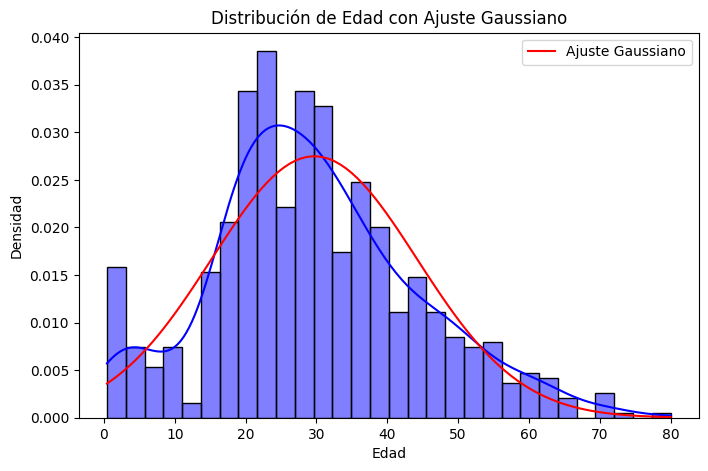

In [12]:
#Histograma de edades con ajuste Gaussiano
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), bins=30, kde=True, stat="density", color="blue")

# Ajuste Gaussiano
mu, sigma = norm.fit(df['age'].dropna())
x = np.linspace(df['age'].min(), df['age'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="Ajuste Gaussiano")

plt.title("Distribución de Edad con Ajuste Gaussiano")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## Distribución Normal (Gaussiana)
La **distribución normal** o **distribución de Gauss** es una de las más utilizadas en estadística y probabilidad. Se caracteriza por su forma de campana simétrica en torno a la media.

### Propiedades:
- Definida por dos parámetros: **media** (\(\mu\)) y **desviación estándar** (\(\sigma\)).
- La función de densidad de probabilidad (PDF) es:
  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
  $$
- Aproximación de muchos fenómenos naturales como la altura, peso y calificaciones.

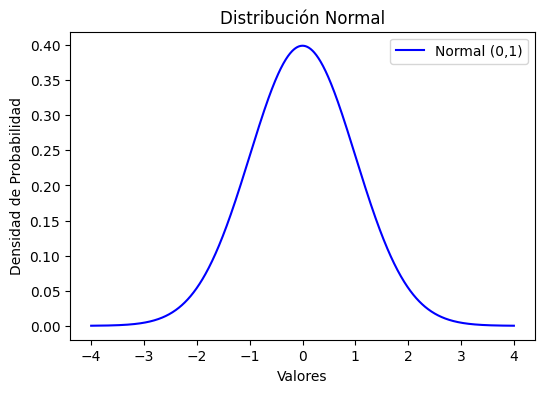

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 1000)  # Valores en el eje X
y = stats.norm.pdf(x, loc=0, scale=1)  # media=0, desviación estándar=1

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Normal (0,1)', color='b')
plt.title("Distribución Normal")
plt.xlabel("Valores")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

## Distribución Uniforme
La **distribución uniforme** es aquella en la que todos los valores dentro de un intervalo tienen la misma probabilidad de ocurrir.

### Propiedades:
- Se define en un intervalo \([a, b]\) donde \(a\) y \(b\) son constantes.
- Su función de densidad de probabilidad es:
  $$
  f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
  $$
- Todos los valores dentro del rango son igualmente probables.

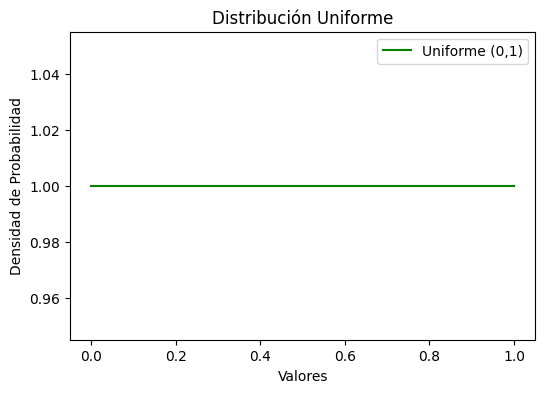

In [14]:
x = np.linspace(0, 1, 1000)
y = stats.uniform.pdf(x, loc=0, scale=1)  # Entre 0 y 1

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Uniforme (0,1)', color='g')
plt.title("Distribución Uniforme")
plt.xlabel("Valores")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

## Distribución Exponencial
La **distribución exponencial** modela el tiempo entre eventos en un proceso de Poisson, es decir, eventos que ocurren de manera continua e independiente.

### Propiedades:
- Se caracteriza por un único parámetro: **lambda** (\(\lambda\)).
- Su función de densidad de probabilidad es:
  $$
  f(x) = \lambda e^{-\lambda x}, \quad x \geq 0
  $$
- Se usa en análisis de tiempos de espera, como la vida útil de productos.

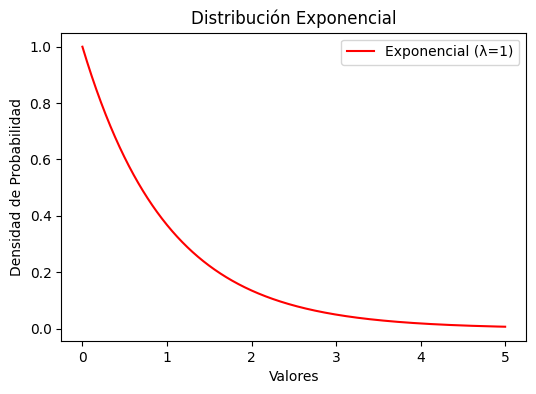

In [15]:
x = np.linspace(0, 5, 1000)
y = stats.expon.pdf(x, scale=1)  # lambda=1

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Exponencial (λ=1)', color='r')
plt.title("Distribución Exponencial")
plt.xlabel("Valores")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

## Distribución Binomial
La **distribución binomial** modela el número de éxitos en \(n\) ensayos independientes de un experimento de Bernoulli con probabilidad \(p\).

### Propiedades:
- Se define por dos parámetros: **n** (número de ensayos) y **p** (probabilidad de éxito).
- Su función de probabilidad es:
  $$
  P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
  $$
- Se usa en situaciones como lanzar una moneda \(n\) veces y contar cuántas veces cae cara.



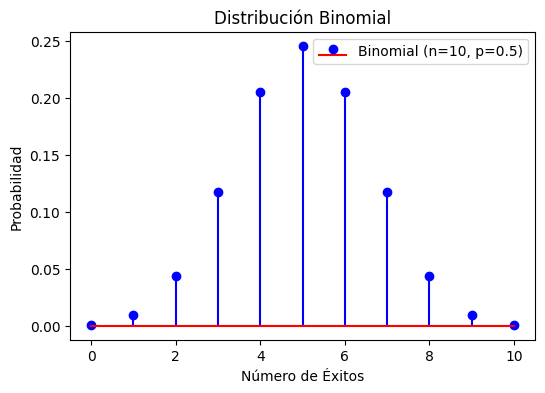

In [16]:
n, p = 10, 0.5  # 10 ensayos, probabilidad 0.5
x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p)

plt.figure(figsize=(6, 4))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt="r-")
plt.title("Distribución Binomial")
plt.xlabel("Número de Éxitos")
plt.ylabel("Probabilidad")
plt.legend(["Binomial (n=10, p=0.5)"])
plt.show()


## Distribución de Poisson
La **distribución de Poisson** modela el número de eventos que ocurren en un intervalo de tiempo fijo o espacio dado, cuando los eventos ocurren con una tasa promedio constante.

### Propiedades:
- Se define por el parámetro \(\lambda\) (tasa promedio de ocurrencia).
- Su función de probabilidad es:
  $$
  P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
  $$
- Se usa en aplicaciones como el número de llamadas a un call center por minuto.



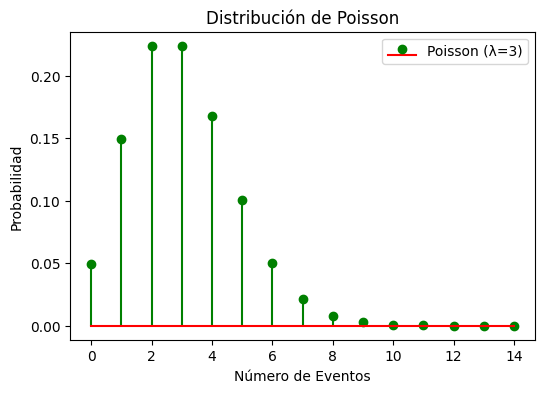

In [17]:
lambda_poisson = 3  # Parámetro lambda = 3
x = np.arange(0, 15)
y = stats.poisson.pmf(x, lambda_poisson)

plt.figure(figsize=(6, 4))
plt.stem(x, y, linefmt='g-', markerfmt='go', basefmt="r-")
plt.title("Distribución de Poisson")
plt.xlabel("Número de Eventos")
plt.ylabel("Probabilidad")
plt.legend(["Poisson (λ=3)"])
plt.show()


## Distribución Gamma
La **distribución Gamma** es una generalización de la distribución exponencial y se usa para modelar tiempos de espera hasta que ocurren varios eventos.

### Propiedades:
- Se define por dos parámetros: **forma** (\(k\)) y **escala** (\(\theta\)).
- Su función de densidad de probabilidad es:
  $$
  f(x) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \Gamma(k)}, \quad x > 0
  $$
- Se usa en tiempos de vida de sistemas, como la duración de baterías.



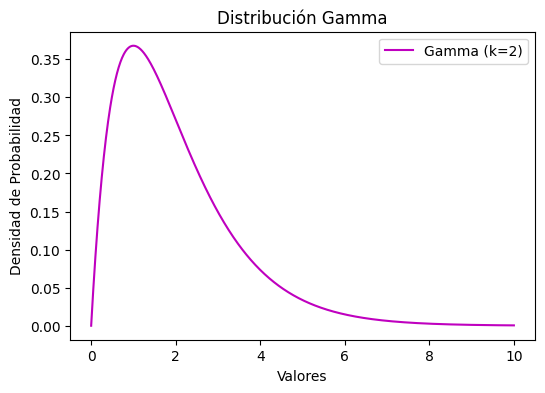

In [18]:
x = np.linspace(0, 10, 1000)
y = stats.gamma.pdf(x, a=2)  # Parámetro shape = 2

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Gamma (k=2)', color='m')
plt.title("Distribución Gamma")
plt.xlabel("Valores")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()


# **Ejercicio de Probabilidad Condicional con el Titanic**

## **Introducción**
La probabilidad condicional nos permite responder preguntas del tipo **P(A | B)**, es decir, la probabilidad de que ocurra el evento **A** dado que sabemos que ha ocurrido el evento **B**.  

En este ejercicio, analizaremos datos reales del famoso naufragio del **Titanic** para responder preguntas como:  

- ¿Cuál es la probabilidad de que una persona haya sobrevivido, dado que era mujer?  
- ¿Es más probable que haya sobrevivido un niño o un adulto?  
- ¿Cuál es la probabilidad de que una persona haya sido de primera clase, dado que sobrevivió?


In [19]:
# Cantidad total de pasajeros
total_pasajeros = len(df)

# Cantidad de pasajeros que sobrevivieron
total_sobrevivientes = df['survived'].sum()

# Cantidad de mujeres que sobrevivieron
mujeres_sobrevivientes = df[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0] #en el código se usa para contar la cantidad de filas en el DataFrame filtrado.

# Cantidad de hombres que sobrevivieron
hombres_sobrevivientes = df[(df['sex'] == 'male') & (df['survived'] == 1)].shape[0]

# Calcular la probabilidad P(mujer | sobrevivió)
p_mujer_dado_sobrevivió = mujeres_sobrevivientes / total_sobrevivientes

# Calcular la probabilidad P(hombre | sobrevivió)
p_hombre_dado_sobrevivió = hombres_sobrevivientes / total_sobrevivientes

# Imprimir los resultados
print(f"Total de pasajeros: {total_pasajeros}")
print(f"Total de sobrevivientes: {total_sobrevivientes}")
print(f"Mujeres que sobrevivieron: {mujeres_sobrevivientes}")
print(f"Hombres que sobrevivieron: {hombres_sobrevivientes}")
print(f"P(Mujer | Sobrevivió): {p_mujer_dado_sobrevivió:.4f}")
print(f"P(Hombre | Sobrevivió): {p_hombre_dado_sobrevivió:.4f}")

Total de pasajeros: 891
Total de sobrevivientes: 342
Mujeres que sobrevivieron: 233
Hombres que sobrevivieron: 109
P(Mujer | Sobrevivió): 0.6813
P(Hombre | Sobrevivió): 0.3187


In [20]:
# Probabilidad condicional P(sobrevive | niño) y P(sobrevive | adulto)
p_sobrevive_niño = df[df['age'] < 18]['survived'].mean()
p_sobrevive_adulto = df[df['age'] >= 18]['survived'].mean()

In [21]:
print(f"Probabilidad de sobrevivir siendo niño: {p_sobrevive_niño:.2f}") #Recuerde .2f es para mostrar 2 decimales.
print(f"Probabilidad de sobrevivir siendo adulto: {p_sobrevive_adulto:.2f}")

Probabilidad de sobrevivir siendo niño: 0.54
Probabilidad de sobrevivir siendo adulto: 0.38


In [22]:
# Correlación de Pearson entre edad y tarifa pagada
df_clean = df[['age', 'fare']].dropna()  # Eliminar valores nulos
corr, _ = pearsonr(df_clean['age'], df_clean['fare'])

In [23]:
print(f"Correlación de Pearson entre edad y tarifa: {corr:.2f}")

Correlación de Pearson entre edad y tarifa: 0.10


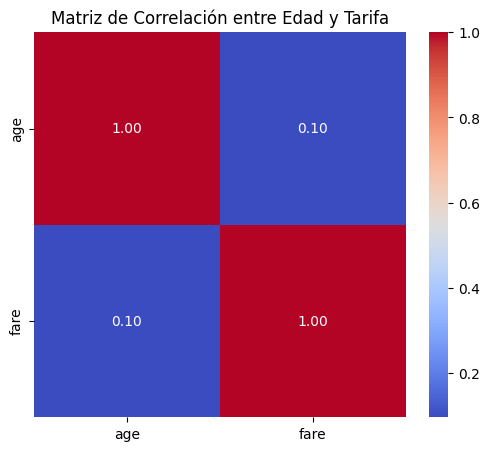

In [24]:
plt.figure(figsize=(6,5))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Edad y Tarifa")
plt.show()

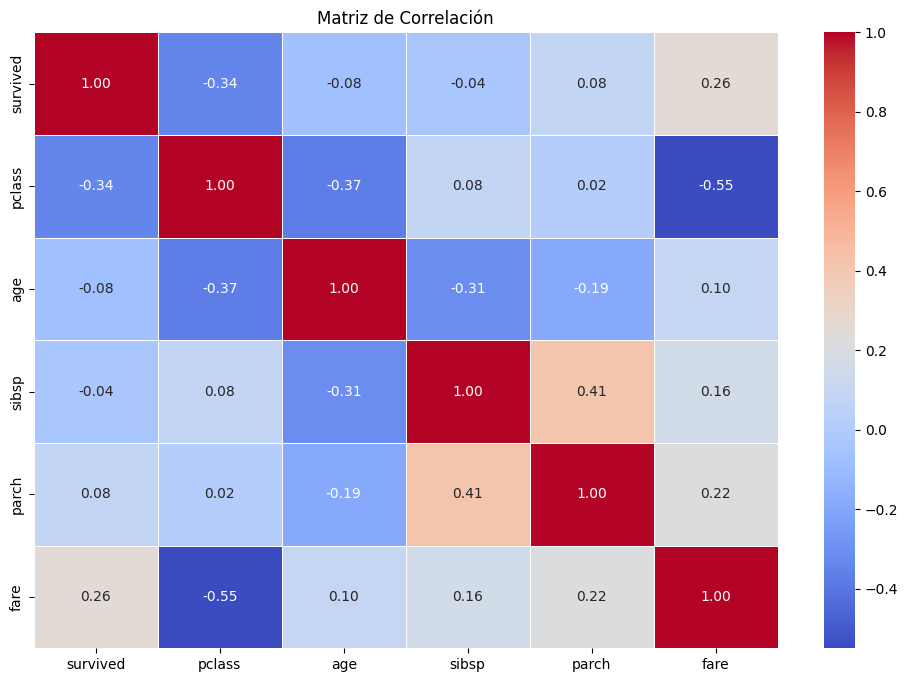

In [25]:
# Seleccionar solo las columnas numéricas que quieres analizar
df_numericas = df.select_dtypes(include=[np.number])
#Calcular la matriz de correlación
correlation_matrix = df_numericas.corr()
#Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


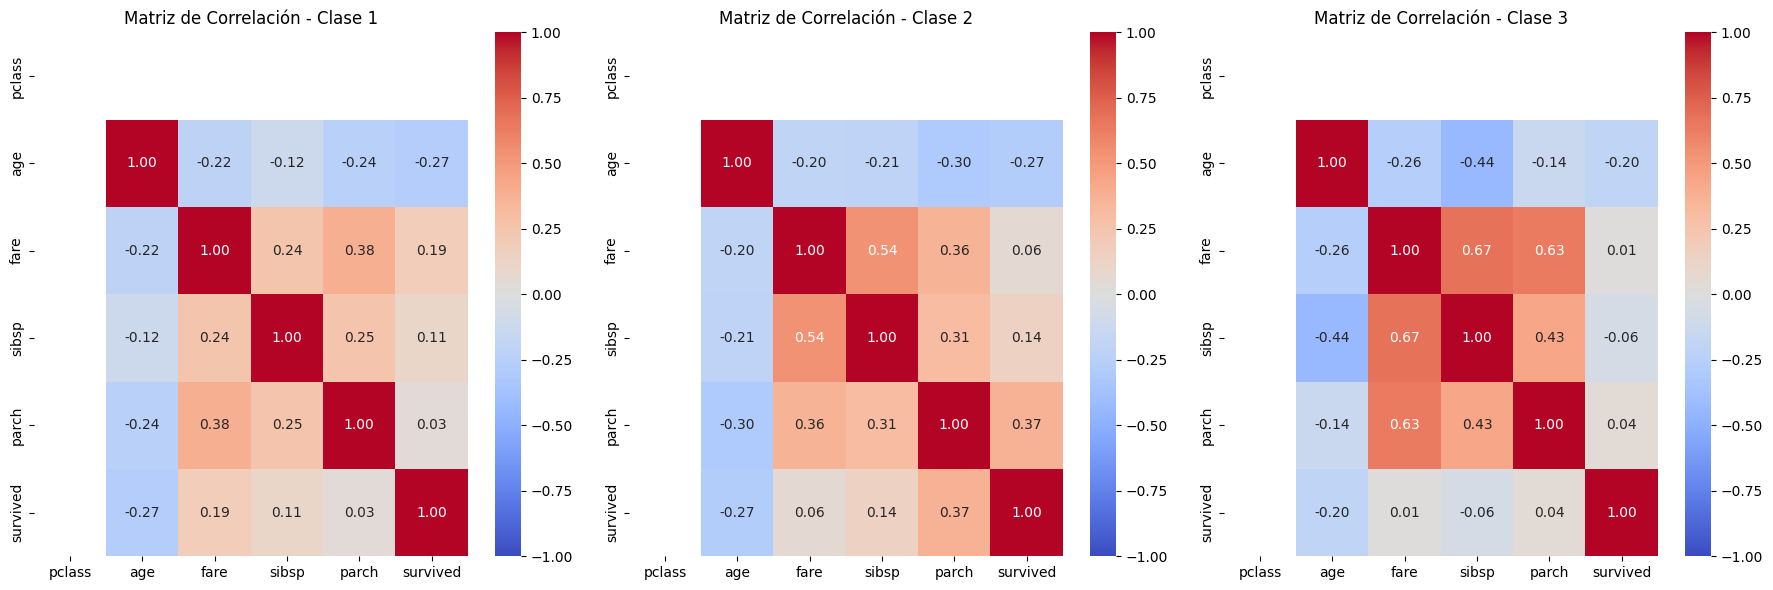

In [ ]:
# Seleccionar solo las columnas numéricas relevantes para la correlación
df_numeric = df[['pclass', 'age', 'fare', 'sibsp', 'parch', 'survived']].dropna()

# Crear gráficos de correlación para cada clase de boleto
plt.figure(figsize=(18, 6)) # Ajustamos el tamaño del gráfico

# Iteramos sobre cada clase de boleto (1, 2, 3)
for i, pclass in enumerate(sorted(df_numeric["pclass"].unique()), 1):
    df_subset = df_numeric[df_numeric["pclass"] == pclass]  # Filtramos los datos para cada clase

    plt.subplot(1, 3, i) # Dividimos la figura en 3 columnas, una por cada clase
    sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)  # Limitamos los valores entre -1 y 1 con vmin y vmax
    plt.title(f"Matriz de Correlación - Clase {pclass}")

plt.tight_layout() # Ajustamos el diseño de los gráficos para que no se superpongan
plt.show()

## Tarea Ayudantía:

1. Implemente funciones propias para calcular el promedio, la mediana, el mínimo, el máximo y varianza de cada uno de los atributos del conjunto de datos titanic calculados anteriormente, luego compare con los resultados vistos anteriormente.

- ¿Los valores obtenidos con las funciones propias coinciden con los de Pandas? ¿Por qué sí o por qué no?

- ¿Hay diferencias entre la varianza calculada manualmente y la de Pandas? ¿Por qué?

- **¿Por qué es importante calcular estas métricas en el análisis de datos?**

- ¿Qué información relevante se puede extraer sobre los pasajeros del Titanic a partir de estos cálculos?



2. Observe la matriz de correlacion de clase 1, clase 2 y clase 3 del conjunto de datos y responda que par de atributos estan mayormente correlacionados de forma positiva y que par de atributos estan mayormente correlacionados de forma negativa. Reflexione porque podría suceder esto.

3. Haga un grafico de dispersion para el par de atributos correlacionados de forma positiva y otro grafico de dispersion para el par de atributos correlacionados de forma negativa, luego explique cuales son las diferencias y a que se debe.

## **Extra**

# **Regresión Lineal con el Dataset del Titanic**  

## **¿Qué es la Regresión Lineal?**  
La **Regresión Lineal** es un método estadístico que permite modelar la relación entre una variable dependiente (objetivo) y una o más variables independientes (predictoras). Se basa en la ecuación:  

$$ y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n $$  

Donde:  
- \( y \) es la variable objetivo.  
- $x_1, x_2, ... x_n $ son las variables predictoras.  
- $ b_0 $ es el **intercepto** (valor de \( y \) cuando todas las \( x \) son 0).  
-$ b_1, b_2, ..., b_n $ son los **coeficientes** de cada variable.  

---

## **1. Preparación de los Datos**  
### **Carga del dataset y selección de variables**  
En este análisis, usamos el dataset **Titanic**, que contiene información sobre los pasajeros, como la tarifa del boleto (`fare`), la edad (`age`), la clase del boleto (`pclass`), y el número de familiares a bordo (`sibsp` y `parch`).  

Para construir el modelo, seleccionamos las siguientes variables:  

- **Variable objetivo:** `fare` (Tarifa del boleto)  
- **Variables predictoras:**  
  - `pclass` (Clase del boleto: 1, 2, 3)  
  - `age` (Edad del pasajero)  

---

## **2. División en Datos de Entrenamiento y Prueba**  
Para evaluar el rendimiento del modelo, se divide el dataset en dos partes:  

1. **Datos de Entrenamiento (80%)**: Se usan para ajustar el modelo.  
2. **Datos de Prueba (20%)**: Se usan para evaluar qué tan bien predice el modelo en datos no vistos.  

Esto se debe a que es un algoritmo supervisado, los datos de entrenamiento y de prueba.

Usamos la función `train_test_split()` de `sklearn.model_selection`, que separa aleatoriamente los datos en estas dos partes.  

---

## **3. Creación y Entrenamiento del Modelo**  
1. Se crea una instancia del modelo de **Regresión Lineal** con `LinearRegression()`.  
2. Se entrena el modelo con los datos de entrenamiento usando `.fit(X_train, y_train)`.  

Durante el entrenamiento, el modelo **ajusta los coeficientes $b_1, b_2, \dots $** para minimizar el error entre las predicciones y los valores reales.  

---

## **4. Predicción y Evaluación del Modelo**  
Después del entrenamiento, usamos `.predict(X_test)` para hacer predicciones en los datos de prueba.  

Para evaluar el modelo, calculamos:  
- **Error Cuadrático Medio (MSE):**  
  
  $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  - Mide cuánto se desvían las predicciones de los valores reales.  
  - Valores menores indican mejor ajuste.  

- **Coeficiente de Determinación (\( R^2 \)):**  

  $$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$ 
  - Indica qué porcentaje de la variabilidad en `fare` es explicado por las variables predictoras.  
  - Valores cercanos a 1 indican un buen ajuste.  

Dependiendo del tipo de problema, usamos diferentes métricas de evaluación. Para regresión es distinto que para clasificación.

---

## **5. Visualización de la Regresión**  
Para interpretar los resultados, se grafica la relación entre **Edad (`age`) y Tarifa (`fare`)**.  
Se superpone la línea de **Regresión Lineal**, que muestra la tendencia general de los datos.  


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar la base de datos del Titanic
df = sns.load_dataset("titanic")

# Seleccionar solo columnas numéricas y eliminar valores nulos
df = df[['fare', 'age', 'pclass', 'sibsp', 'parch']].dropna()

# Mostrar las primeras filas
df.head()


,fare,age,pclass,sibsp,parch
0,7.2500,22.0,3,1,0
1,71.2833,38.0,1,1,0
2,7.9250,26.0,3,0,0
3,53.1000,35.0,1,1,0
4,8.0500,35.0,3,0,0


In [2]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df[['pclass', 'age']]
y = df['fare']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Coeficientes del modelo: [-38.29728935  -0.43695889]
Intercepto del modelo: 133.30726668128779
Error cuadrático medio (MSE): 3364.9229128569814
Coeficiente de determinación (R²): 0.1917633318253047


In [3]:
# Crear una nueva variable: Total de familiares a bordo
df["family_size"] = df["sibsp"] + df["parch"]

# Definir variables
X = df[['family_size']]
y = df['fare']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_familia = LinearRegression()
modelo_familia.fit(X_train, y_train)

# Predicciones
y_pred_familia = modelo_familia.predict(X_test)

# Evaluar el modelo
mse_familia = mean_squared_error(y_test, y_pred_familia)
r2_familia = r2_score(y_test, y_pred_familia)

# Mostrar resultados
print("Coeficiente del modelo:", modelo_familia.coef_[0])
print("Intercepto:", modelo_familia.intercept_)
print("MSE:", mse_familia)
print("R²:", r2_familia)


Coeficiente del modelo: 9.188549688420942
Intercepto: 26.59806009492498
MSE: 4320.613644110585
R²: -0.03778852194302562


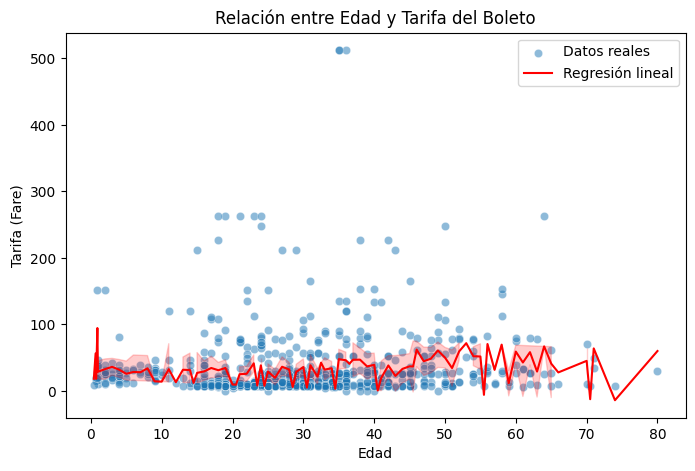

In [4]:
# Gráfico de regresión: Tarifa vs Edad
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['fare'], alpha=0.5, label="Datos reales")
sns.lineplot(x=df['age'], y=modelo.predict(df[['pclass', 'age']]), color="red", label="Regresión lineal")
plt.title("Relación entre Edad y Tarifa del Boleto")
plt.xlabel("Edad")
plt.ylabel("Tarifa (Fare)")
plt.legend()
plt.show()
